In [29]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from ucimlrepo import fetch_ucirepo
from matplotlib.colors import ListedColormap



np.set_printoptions(precision=5, suppress=True)

# Set random seed to student number
np.random.seed(46387334) # TODO: UNCOMMENT

In [30]:
# Helper functions
def sig_fig(X, sigfigs):
    exp = np.floor(ma.log10(abs(X)).filled(0))
    return np.round(X*10**-exp, sigfigs-1) * 10**exp

def get_diff(a1, a2):
    print(f"{a1.shape=}")
    print(f"{a2.shape=}")

    rows, cols = a1.shape
    for i in range(rows):
        for j in range(cols):
            print(f"[{i},{j}]: {round(a1[i, j], 3) :>5} vs {round(a2[i, j], 3) :>7}  |  Error: {(a1[i, j] - a2[i, j]) * (100 / a1[i, j])  :.2f}%")

## 2.b)

     death_event
0              1
1              1
2              1
3              1
4              1
..           ...
294            0
295            0
296            0
297            0
298            0

[299 rows x 1 columns]


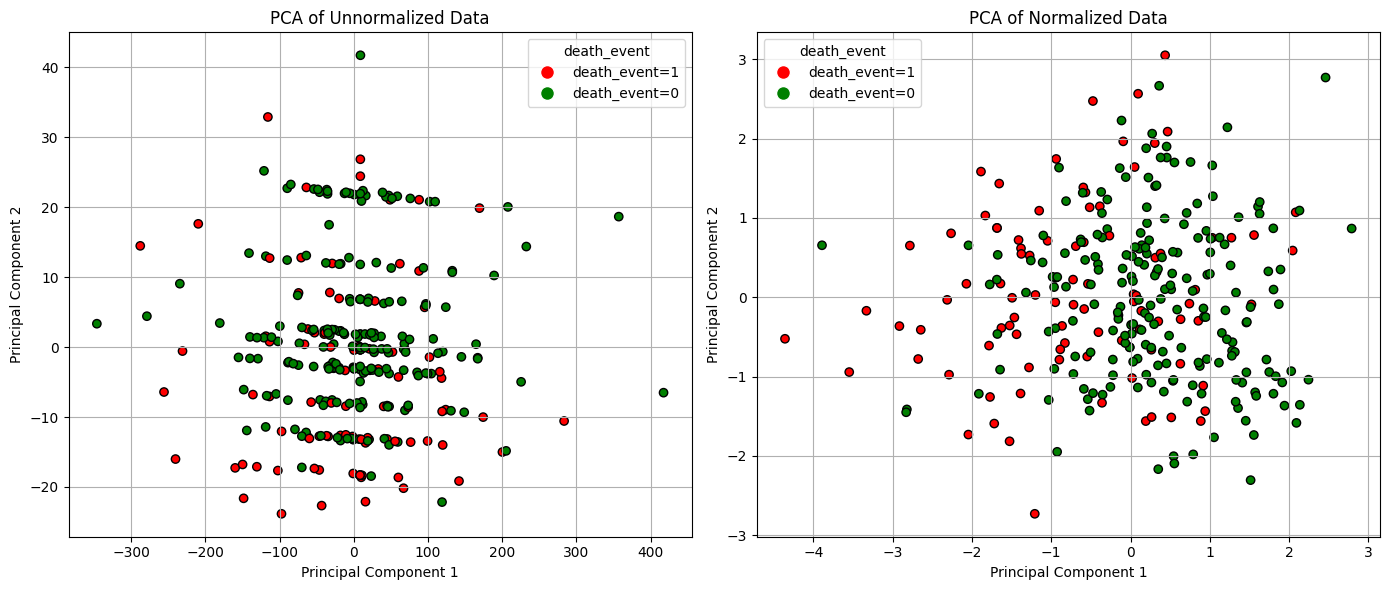

In [31]:
from ucimlrepo import fetch_ucirepo 

# Fetch dataset from https://archive.ics.uci.edu/dataset/519/heart+failure+clinical+records
heart_failure_clinical_records = fetch_ucirepo(id=519) 
  
# Extract data (as pandas dataframes) 
X = heart_failure_clinical_records.data.features 
y = heart_failure_clinical_records.data.targets 

print(y)

# Ensure y is a numeric array
y = np.asarray(y).astype(float)

# Transform the needed columns into the "normal" forms
X['logcp']    = np.log(X['creatinine_phosphokinase'])
X['sqrtplat'] = np.sqrt(X['platelets'])
X['recipsc']  = 1 / X['serum_creatinine']

# Redfine X to just be the 5 columns of interest
cols_to_keep = ['logcp', 'ejection_fraction', 'sqrtplat', 'recipsc', 'serum_sodium']
X_trans      = X[cols_to_keep]

# Normalize the dataset
scaler = StandardScaler()
X_norm = scaler.fit_transform(X_trans)

# Perform PCA on the original dataset
pca_original = PCA(n_components=2)
X_pca_original = pca_original.fit_transform(X_trans)
principal_components_original = pca_original.components_

# Perform PCA on the normalized dataset
pca_normalized = PCA(n_components=2)
X_pca_normalized = pca_normalized.fit_transform(X_norm)
principal_components_normalized = pca_normalized.components_

# Create scatter plots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
cmap = ListedColormap(['green', 'red']) # [0, 1]

axs[1].grid()
axs[0].grid()

# Plot for unnormalized data
scatter1 = axs[0].scatter(X_pca_original[:, 0], X_pca_original[:, 1], c=y, cmap=cmap, edgecolor='k')
axs[0].set_title('PCA of Unnormalized Data')
axs[0].set_xlabel('Principal Component 1')
axs[0].set_ylabel('Principal Component 2')

# Plot for normalized data
scatter2 = axs[1].scatter(X_pca_normalized[:, 0], X_pca_normalized[:, 1], c=y, cmap=cmap, edgecolor='k')
axs[1].set_title('PCA of Normalized Data')
axs[1].set_xlabel('Principal Component 1')
axs[1].set_ylabel('Principal Component 2')






from matplotlib.lines import Line2D

handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='death_event=1'),
           Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='death_event=0')]
axs[0].legend(handles=handles, title='death_event')
axs[1].legend(handles=handles, title='death_event')



plt.tight_layout()
plt.show()


In [32]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from ucimlrepo import fetch_ucirepo

# Split the PCA-transformed data into training and test sets
X_train_orig, X_test_orig, y_train, y_test = train_test_split(X_pca_original, y, test_size=0.3, random_state=42)
X_train_norm, X_test_norm, y_train, y_test = train_test_split(X_pca_normalized, y, test_size=0.3, random_state=42)

# Fit SVM on the PCA-transformed unnormalized data
svm_orig = SVC()
svm_orig.fit(X_train_orig, y_train)
y_pred_orig = svm_orig.predict(X_test_orig)
accuracy_orig = accuracy_score(y_test, y_pred_orig)
print(f'Accuracy on 2PC Unnormalized Data: {accuracy_orig:.2f}')

# Fit SVM on the PCA-transformed normalized data
svm_norm = SVC()
svm_norm.fit(X_train_norm, y_train)
y_pred_norm = svm_norm.predict(X_test_norm)
accuracy_norm = accuracy_score(y_test, y_pred_norm)
print(f'Accuracy on 2PC Normalized Data: {accuracy_norm:.2f}')

Accuracy on 2PC Unnormalized Data: 0.58
Accuracy on 2PC Normalized Data: 0.67


/home/timryall/repos/uq/STAT3006/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/timryall/repos/uq/STAT3006/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
